# Example Notebook

The purpose of this notebook is to capture an overview of all the main pieces of code that were used within this project being called from a single example file. 

Therefore, they number of epoches and example outputs are very limited as they were not used to obtain the real results, these are just examples of how the code was used

The actual scripts used to collet all the data for this project are mentioned in the README.md file within this same directory.



## Model Comparison

To test the different LLMs

In [5]:
import pandas as pd
import time
import json
from data_processing.prompt import system_prompt
from data_processing.functions import extract_metadata, filter_text, llm, validate_bio_format, parse_bio_string, save_row_to_jsonl

In [4]:
test_samples = 2
raw_data_path = "./data/raw/SimSUM.csv"

models = {
    "llama": {
        "output_path": "./data/processed/demo_experiment/llama_processed.jsonl",
        "model_name": "llama3:8b",
        "completion_time": None,
        "success_count": 0,
        "failure_count": 0
    },
    "gemma": {
        "output_path": "./data/processed/demo_experiment/gemma_processed.jsonl",
        "model_name": "gemma3:12b",
        "completion_time": None,
        "success_count": 0,
        "failure_count": 0
    }, 
    "qwen": {
        "output_path": "./data/processed/demo_experiment/qwen_processed.jsonl",
        "model_name": "qwen3:8b",
        "completion_time": None,
        "success_count": 0,
        "failure_count": 0
    }
}

# Reading existing files
df_simsum = pd.read_csv(raw_data_path, sep=';', engine='python', index_col=0)
features = df_simsum.columns.to_list()[:-2]

# Iterate through some samples in the DataFrame
for key, info in models.items():

    print(f"Processing with model: {key}")
    start = time.time()

    for index, row in df_simsum.iterrows():

        if index >= test_samples:
            break
        
        print("Row: ", index)
        metadata, text = extract_metadata(row, features), filter_text(row["text"])
        input_prompt = "Text: " + text + " Metadata: " + str(metadata)
        llm_output = llm(system_prompt, input_prompt, ollama_model=info["model_name"])
        
        if validate_bio_format(llm_output):
            print(f"[SUCCESS] - Row {index} passed BIO format validation.")
            info["success_count"] += 1

            tokens, labels = parse_bio_string(llm_output)

            save_row_to_jsonl(info['output_path'], index, tokens, labels)
            print(f"[SAVED] - Row {index} saved to {info['output_path']}.\n")
        else:
            info["failure_count"] += 1

    end = time.time()
    info["completion_time"] = end - start
    print(f"Processing with model {key} completed in {end - start:.2f} seconds.\n")

# Print summary of completion times
for key, info in models.items():
    print(f"Model: {key}, Completion Time: {info['completion_time']:.2f} seconds")
    print(f"Model: {key}, Success Count: {info['success_count']}, Failure Count: {info['failure_count']}\n")

Processing with model: llama
Row:  0
[SUCCESS] - Row 0 passed BIO format validation.
[SAVED] - Row 0 saved to ./data/processed/demo_experiment/llama_processed.jsonl.

Row:  1
[ERROR] Segment 0: 'Text:' is missing '<' or '>'
Processing with model llama completed in 8.14 seconds.

Processing with model: gemma
Row:  0
[SUCCESS] - Row 0 passed BIO format validation.
[SAVED] - Row 0 saved to ./data/processed/demo_experiment/gemma_processed.jsonl.

Row:  1
[SUCCESS] - Row 1 passed BIO format validation.
[SAVED] - Row 1 saved to ./data/processed/demo_experiment/gemma_processed.jsonl.

Processing with model gemma completed in 24.54 seconds.

Processing with model: qwen
Row:  0
[SUCCESS] - Row 0 passed BIO format validation.
[SAVED] - Row 0 saved to ./data/processed/demo_experiment/qwen_processed.jsonl.

Row:  1
[SUCCESS] - Row 1 passed BIO format validation.
[SAVED] - Row 1 saved to ./data/processed/demo_experiment/qwen_processed.jsonl.

Processing with model qwen completed in 60.15 seconds.



## Generating full label dataset

Using Gemma3 that was selected the following code was run.

In [7]:
raw_data_path = "./data/raw/SimSUM.csv"
output_path = "./data/processed/demo_sim_sum_gem3_processed.jsonl"

# Reading existing files
df_simsum = pd.read_csv(raw_data_path, sep=';', engine='python', index_col=0)
features = df_simsum.columns.to_list()[:-2]

processed_data = [json.loads(line) for line in open(output_path)]
if len(processed_data) > 0:
    start_index = processed_data[-1]['index'] + 1
else:
    start_index = 0

# Iterate through each row in the DataFrame
for index, row in df_simsum.iterrows():

    if index < start_index:
        continue
    
    print("Row: ", index)
    metadata, text = extract_metadata(row, features), filter_text(row["text"])
    input_prompt = "Text: " + text + " Metadata: " + str(metadata)
    llm_output = llm(system_prompt, input_prompt)
    
    if validate_bio_format(llm_output):
        print(f"[SUCCESS] - Row {index} passed BIO format validation.")

        tokens, labels = parse_bio_string(llm_output)

        save_row_to_jsonl(output_path, index, tokens, labels)
        print(f"[SAVED] - Row {index} saved to {output_path}.\n")

    if index > 10:
        print("For the purpose of this example notebook only running for 10 iterations")
        break

Row:  0
[SUCCESS] - Row 0 passed BIO format validation.
[SAVED] - Row 0 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  1
[SUCCESS] - Row 1 passed BIO format validation.
[SAVED] - Row 1 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  2
[SUCCESS] - Row 2 passed BIO format validation.
[SAVED] - Row 2 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  3
[SUCCESS] - Row 3 passed BIO format validation.
[SAVED] - Row 3 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  4
[SUCCESS] - Row 4 passed BIO format validation.
[SAVED] - Row 4 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  5
[SUCCESS] - Row 5 passed BIO format validation.
[SAVED] - Row 5 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  6
[SUCCESS] - Row 6 passed BIO format validation.
[SAVED] - Row 6 saved to ./data/processed/demo_sim_sum_gem3_processed.jsonl.

Row:  7
[SUCCESS] - Row 7 passed BIO format validation.
[SAVED

## Dataset Investigation

In [36]:
from model_processing.data_functions import load_data, split_dataset, build_vocab, plot_vocab_coverage, analyze_word_frequencies, compute_vocab_coverage

In [38]:
processed_data_path = "./data/processed/sim_sum_gem3_processed.jsonl"
sentences, labels = load_data(processed_data_path)

(train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels) = split_dataset(sentences, labels)

Loaded 7215 samples from JSONL.
Training set size: 5050
Validation set size: 1082
Test set size: 1083


Total number of tokens in dataset: 1124599

Top 5 most frequent words:
  word  frequency
0    .      81443
1    ,      50068
2  and      29780
3  the      27300
4   or      23975

Bottom 5 least frequent words:
          word  frequency
7956    Sodium          1
7957  expanded          1
7958     throb          1
7959  localize          1
7960      Most          1

Token coverage after applying min_freq = 5:
Kept tokens: 1117193 (99.3%)
Removed tokens: 7406 (0.7%)


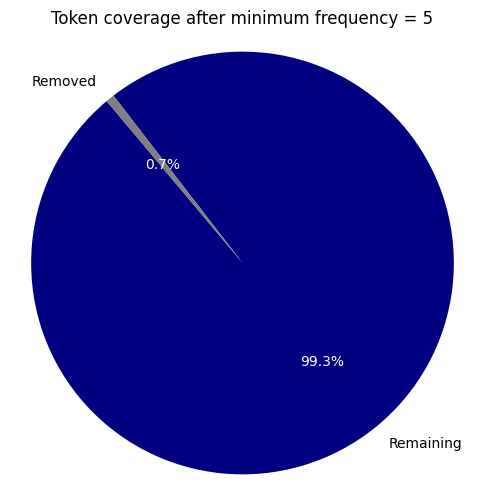

With min_freq = 5 then the amount of words removed is 4529 / 7961


In [39]:
# Testing different minimum frequency values
min_freq = 5
df = analyze_word_frequencies(sentences=sentences, head_n=5, tail_n=5, min_freq=min_freq)
print(f"With min_freq = {min_freq} then the amount of words removed is {(df['frequency'] < min_freq).sum()} / {len(df)}")

Total number of tokens in dataset: 1124599

Top 5 most frequent words:
  word  frequency
0    .      81443
1    ,      50068
2  and      29780
3  the      27300
4   or      23975

Bottom 5 least frequent words:
          word  frequency
7956    Sodium          1
7957  expanded          1
7958     throb          1
7959  localize          1
7960      Most          1

Token coverage after applying min_freq = 10:
Kept tokens: 1111485 (98.8%)
Removed tokens: 13114 (1.2%)


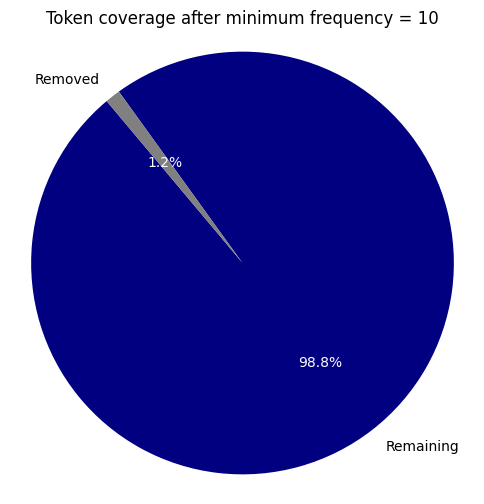

With min_freq = 10 then the amount of words removed is 5388 / 7961


In [40]:
min_freq = 10
df = analyze_word_frequencies(sentences=sentences, head_n=5, tail_n=5, min_freq=min_freq)
print(f"With min_freq = {min_freq} then the amount of words removed is {(df['frequency'] < min_freq).sum()} / {len(df)}")

In [41]:
# Build all vocabularies
word_to_idx_train_all = build_vocab(train_sentences, min_freq=1)
word_to_idx_train_5 = build_vocab(train_sentences, min_freq=5)
word_to_idx_train_10 = build_vocab(train_sentences, min_freq=10)
word_to_idx_val = build_vocab(val_sentences, min_freq=1)

Validation vocab coverage: 3600/4100 tokens (87.8%)
Validation vocab coverage: 2726/4100 tokens (66.5%)
Validation vocab coverage: 2185/4100 tokens (53.3%)


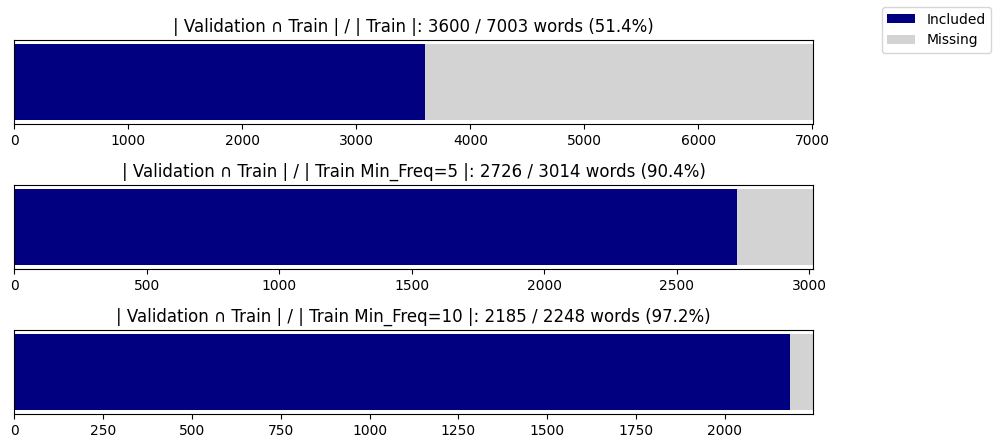

In [42]:
# Compute | Validation ∩ Train | / | Validation |
compute_vocab_coverage(word_to_idx_train_all, word_to_idx_val)
compute_vocab_coverage(word_to_idx_train_5, word_to_idx_val)
compute_vocab_coverage(word_to_idx_train_10, word_to_idx_val)

# Compute | Validation ∩ Train | / | Train |
plot_vocab_coverage(
    denominator_vocabs=[word_to_idx_train_all, word_to_idx_train_5, word_to_idx_train_10],
    numerator_vocabs=[word_to_idx_val, word_to_idx_val, word_to_idx_val],
    titles=["| Validation ∩ Train | / | Train |", "| Validation ∩ Train | / | Train Min_Freq=5 |", "| Validation ∩ Train | / | Train Min_Freq=10 |"],
)

## Initializing the data before training

In [ ]:
import os
import torch
from torch.utils.data import DataLoader

from model_processing.data_functions import (
    load_data,
    split_dataset,
    build_vocab,
    build_BIO_label_map,
    ner_collate_fn,
    get_trial_number,
)
from model_processing.classes import NERDataset, BiLSTM_CRF_Dropout, BiLSTM_CRF
from model_processing.model_functions import train, save_training_info

In [17]:
min_freq = 5
batch_size = 64

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processed_data_path = "./data/processed/sim_sum_gem3_processed.jsonl"
folder_path = f"./models/trial_{get_trial_number()}"

In [15]:
sentences, labels = load_data(processed_data_path)
(train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels) = split_dataset(sentences, labels)

word_to_idx = build_vocab(train_sentences, min_freq=min_freq)
label_to_idx, idx_to_label = build_BIO_label_map(train_labels)

train_dataset = NERDataset(train_sentences, train_labels, word_to_idx, label_to_idx)
val_dataset = NERDataset(val_sentences, val_labels, word_to_idx, label_to_idx)
test_dataset = NERDataset(test_sentences, test_labels, word_to_idx, label_to_idx)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=ner_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=ner_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=ner_collate_fn)

Loaded 7215 samples from JSONL.
Training set size: 5050
Validation set size: 1082
Test set size: 1083


## Now the models need to be defined and trained on a set of hyperparameters

Initially no dropout was used and then dropout was applied after. Not all cases mentioned in the report will be captured here but to show each function and how they were used differently, the "Default Case" with no early stop and regularization will be shown, as well as the final model used.

In [ ]:
# Hyperparameters
epochs = 5
embedding_dim = 128
hidden_dim = 256

# Training Variables
lr = 0.001
l1 = False
early_stop = False

special_notes = "Deafult case demo file"


===== Epoch 1/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.67batch/s, loss=93.4]


Train Loss: 153.8230, Train Acc: 0.7471
Val   Loss: 88.3716, Val   Acc: 0.8233
Validation loss improved — model checkpointed

===== Epoch 2/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.68batch/s, loss=58.2]


Train Loss: 70.9621, Train Acc: 0.8626
Val   Loss: 56.3203, Val   Acc: 0.8835
Validation loss improved — model checkpointed

===== Epoch 3/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.69batch/s, loss=51.9]


Train Loss: 53.2235, Train Acc: 0.8924
Val   Loss: 47.3062, Val   Acc: 0.8959
Validation loss improved — model checkpointed

===== Epoch 4/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.69batch/s, loss=42.5]


Train Loss: 47.0386, Train Acc: 0.9007
Val   Loss: 43.4489, Val   Acc: 0.9002
Validation loss improved — model checkpointed

===== Epoch 5/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.67batch/s, loss=40.1]


Train Loss: 43.7581, Train Acc: 0.9052
Val   Loss: 41.1417, Val   Acc: 0.9037
Validation loss improved — model checkpointed

Model saved to: ./models/trial_19/model.pt
Saved plot to: ./models/trial_19/training_plot.png


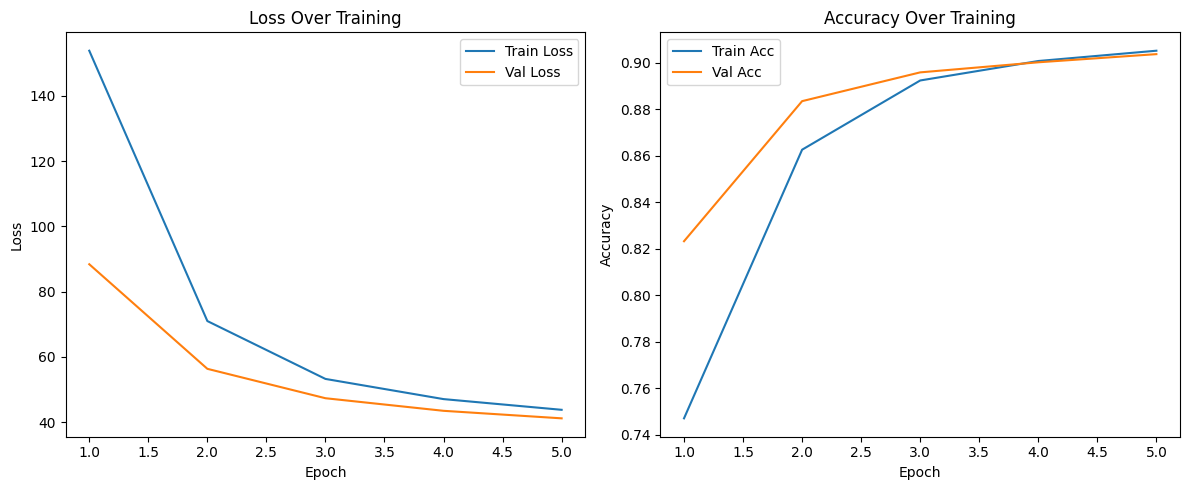

Saved CSV to: ./models/trial_19/training_data.csv
Saved training info to: ./models/trial_19/training_info.txt


In [25]:
model = BiLSTM_CRF(vocab_size=len(word_to_idx), tagset_size=len(label_to_idx), embedding_dim=embedding_dim, hidden_dim=hidden_dim)
folder_path = f"./models/trial_{get_trial_number()}"
os.makedirs(folder_path, exist_ok=True)

train(model=model, train_loader=train_loader, val_loader=val_loader, epochs=epochs, device=device, save_path=folder_path, lr=lr, l1=l1, early_stop=early_stop)
save_training_info(save_path=folder_path, min_freq=min_freq, batch_size=batch_size, epochs=epochs, embedding_dim=embedding_dim, hidden_dim=hidden_dim, lr=lr, l1=l1, early_stop=early_stop, special_notes=special_notes)

### Applying Regularization Techniques and Early Stop

In [ ]:
# Hyperparameters
epochs = 5

embedding_dim = 128
hidden_dim = 256
dropout_rate = 0.2

# Training Variables
lr = 0.001

l1 = True
l1_lambda = 1e-5

early_stop = True
patience = 3
min_delta = 0.3
train_delta = 0.1

special_notes = "Regularization and early stop"


===== Epoch 1/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.64batch/s, loss=96.6]


Train Loss: 159.4168, Train Acc: 0.7390
Val   Loss: 90.6642, Val   Acc: 0.8160
Validation loss improved — model checkpointed

===== Epoch 2/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.62batch/s, loss=66.3]


Train Loss: 78.2732, Train Acc: 0.8482
Val   Loss: 58.1486, Val   Acc: 0.8791
Validation loss improved — model checkpointed

===== Epoch 3/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.62batch/s, loss=55]  


Train Loss: 59.7418, Train Acc: 0.8803
Val   Loss: 49.1025, Val   Acc: 0.8935
Validation loss improved — model checkpointed

===== Epoch 4/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.68batch/s, loss=50.6]


Train Loss: 53.1086, Train Acc: 0.8903
Val   Loss: 45.1218, Val   Acc: 0.8981
Validation loss improved — model checkpointed

===== Epoch 5/5 =====


Training: 100%|██████████| 79/79 [00:21<00:00,  3.68batch/s, loss=47.2]


Train Loss: 49.2306, Train Acc: 0.8954
Val   Loss: 42.4507, Val   Acc: 0.9010
Validation loss improved — model checkpointed

Model saved to: ./models/trial_20/model.pt
Saved plot to: ./models/trial_20/training_plot.png


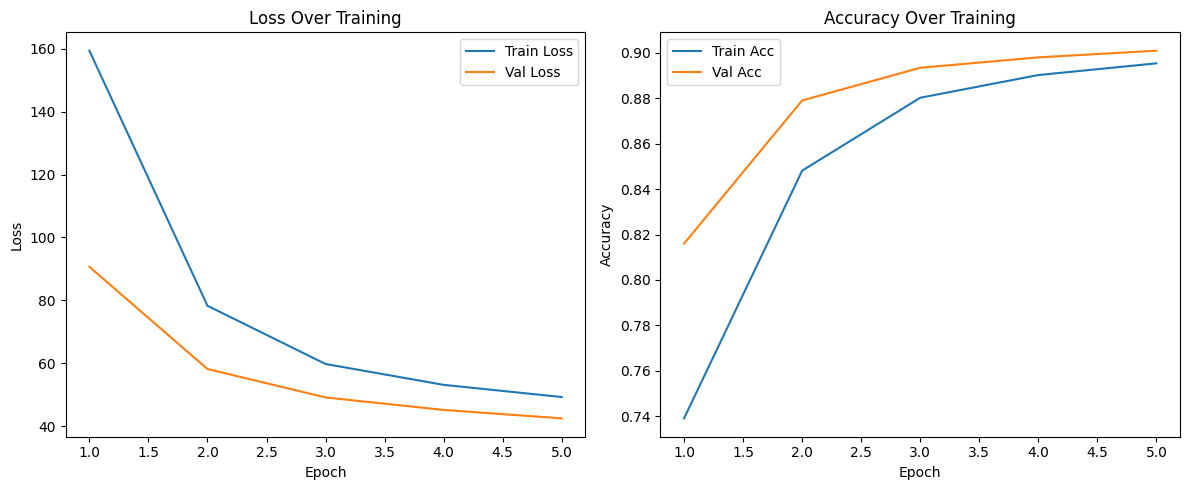

Saved CSV to: ./models/trial_20/training_data.csv
Saved training info to: ./models/trial_20/training_info.txt


In [27]:
model = BiLSTM_CRF_Dropout(vocab_size=len(word_to_idx), tagset_size=len(label_to_idx), embedding_dim=embedding_dim, hidden_dim=hidden_dim, dropout_rate=dropout_rate)
folder_path = f"./models/trial_{get_trial_number()}"
os.makedirs(folder_path, exist_ok=True)

train(model=model, train_loader=train_loader, val_loader=val_loader, epochs=epochs, device=device, save_path=folder_path, lr=lr, l1=l1, l1_lambda=l1_lambda, early_stop=early_stop, patience=patience, min_delta=min_delta, train_delta=train_delta)
save_training_info(save_path=folder_path, min_freq=min_freq, batch_size=batch_size, epochs=epochs, embedding_dim=embedding_dim, hidden_dim=hidden_dim, lr=lr, l1=l1, l1_lambda=l1_lambda, early_stop=early_stop, patience=patience, min_delta=min_delta, train_delta=train_delta, special_notes=special_notes)

## Inferencing on final model to test the accuracy on the test set

Instead of using the test results here the actual final model trained with 40 epoches will be used.

In [ ]:
import torch

from model_processing.classes import NERDataset, BiLSTM_CRF_Dropout

from model_processing.data_functions import (
    load_data,
    split_dataset,
    build_vocab,
    build_BIO_label_map
)

from model_processing.inference_functions import (
    load_model,
    evaluate_token_accuracy,
    show_prediction_example,
    plot_from_csv
)

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processed_data_path = "./data/processed/sim_sum_gem3_processed.jsonl"
trial_version = "trial_18"
model_path = f"./models/{trial_version}/model.pt"
curve_path = f"./models/{trial_version}/training_data.csv"

embedding_dim, hidden_dim = 128, 256

In [31]:
sentences, labels = load_data(processed_data_path)
(train_sentences, train_labels), (val_sentences, val_labels), (test_sentences, test_labels) = split_dataset(sentences, labels)

word_to_idx = build_vocab(train_sentences, min_freq=5)
label_to_idx, idx_to_label = build_BIO_label_map(train_labels)

test_dataset = NERDataset(test_sentences, test_labels, word_to_idx, label_to_idx)

model = load_model(
    BiLSTM_CRF_Dropout,
    save_path=model_path,
    vocab_size=len(word_to_idx),
    tagset_size=len(label_to_idx),
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    device=device,
)

test_acc = evaluate_token_accuracy(model, test_dataset, device)
print(f"Test Token Accuracy: {test_acc:.4f}")

Loaded 7215 samples from JSONL.
Training set size: 5050
Validation set size: 1082
Test set size: 1083
Test Token Accuracy: 0.9099


In [34]:
sample_id = 0
sample_df = show_prediction_example(model, test_sentences, test_labels, word_to_idx, idx_to_label, sentence_idx=sample_id, device=device)
sample_df

,Token,True Label,Predicted Label
0,Patient,O,O
1,visits,O,O
2,the,O,O
3,clinic,O,O
4,for,O,O
...,...,...,...
137,infection,B-PROBLEM,B-PROBLEM
138,or,O,O
139,inflammation,B-PROBLEM,B-PROBLEM
140,noted,O,O


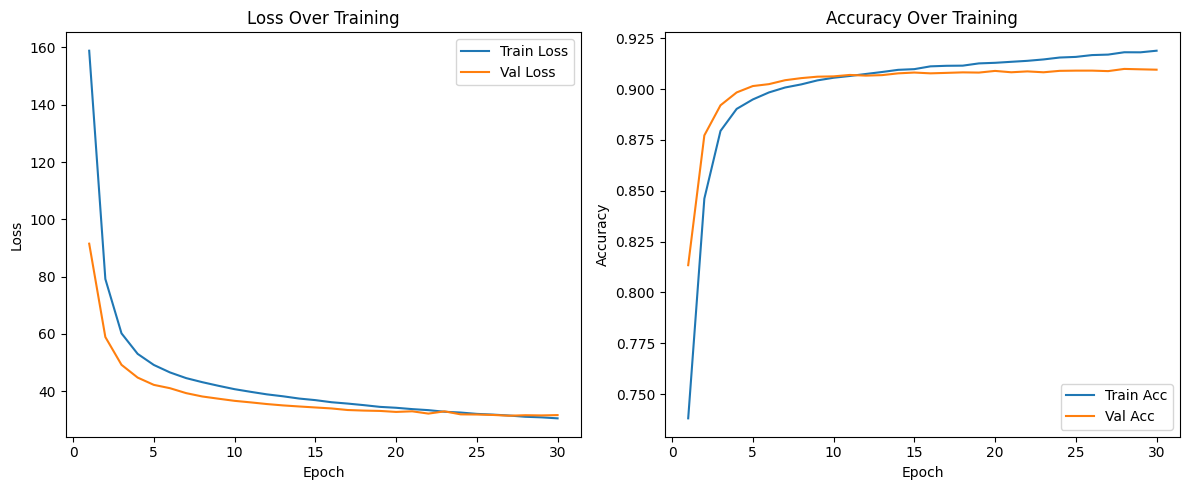

In [35]:
# Ability to replot existing training curve that was saved during training
plot_from_csv(curve_path)